In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import statistics as stat

from matplotlib.font_manager import FontProperties
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base

%matplotlib inline
plt.rcParams['axes.unicode_minus']=False
engine = create_engine('sqlite:///fund.db')

In [2]:
def getTimeStamp(date):
    return int(pd.read_sql(sql='select strftime("%s",?)', con=engine, params=[date]).loc[0][0])

In [3]:
def getNAV(names,start,end):
    start = getTimeStamp(start)
    end = getTimeStamp(end)
    data = pd.read_sql(sql='select * from price where date between ? and ? order by date asc',
                       con=engine,index_col='date', params=[start,end])
    date = pd.read_sql(sql='select distinct date from price where date between ? and ? order by date asc',
                       con=engine,index_col='date', params=[start,end]).index
    NAV = np.zeros((len(names),len(date)))
    for j in range (len(names)):
        temp = data[data['id'] == names[j]]
        NAV[j][0] = temp.iloc[0]['NAV']
        for i,day in enumerate(date[1:]):
            try:
                NAV[j][i+1] = temp.loc[day]['NAV']
            except:
                NAV[j][i+1] = NAV[j][i]
    return NAV

In [4]:
def poolDecide(year):
    start = getTimeStamp(year + '-12-01')
    end = getTimeStamp(year + '-12-31')
    names = pd.read_sql(sql='select distinct id from price where date between ? and ?',
                        con=engine, params=[start,end])
    names = names['id'].sample(n=300).values
    return names

In [5]:
year = input("請輸入欲回測年：")
past_year = str(int(year)-1)

請輸入欲回測年：2015


# 0. 抓出0050各項數據

## 一. 淨值

In [6]:
NAV_0050 = getNAV(['0050 元大台灣50'],year+'-01-01',year+'-12-31')[0]

In [7]:
NAV_0050

array([66.83, 64.85, 65.15, 66.59, 66.17, 65.81, 66.18, 65.61, 65.6 ,
       65.8 , 66.46, 66.84, 67.5 , 67.71, 68.89, 69.  , 69.4 , 69.31,
       68.47, 67.83, 68.23, 68.79, 69.4 , 69.32, 68.78, 68.51, 68.22,
       69.05, 69.36, 69.59, 70.35, 71.  , 70.12, 69.82, 69.9 , 70.09,
       69.72, 70.05, 69.14, 68.96, 69.  , 69.59, 69.4 , 68.65, 69.05,
       70.18, 70.83, 70.93, 71.06, 70.71, 70.28, 69.67, 68.46, 68.79,
       69.29, 68.67, 69.5 , 69.68, 69.01, 69.1 , 69.67, 69.92, 69.51,
       68.68, 69.87, 69.  , 69.02, 69.09, 69.67, 71.3 , 72.57, 72.92,
       72.72, 71.64, 71.12, 71.46, 71.31, 71.18, 70.31, 70.41, 70.57,
       70.6 , 71.04, 70.13, 70.09, 70.54, 71.31, 71.05, 70.26, 70.78,
       70.93, 71.07, 71.22, 71.4 , 71.22, 70.47, 70.38, 70.07, 68.63,
       68.58, 68.75, 67.94, 68.55, 68.84, 68.94, 68.55, 68.32, 68.22,
       68.2 , 69.22, 69.64, 69.75, 70.42, 70.33, 68.92, 69.74, 70.11,
       70.17, 70.15, 69.37, 69.39, 67.45, 66.98, 68.  , 68.07, 68.54,
       68.47, 68.57,

## 二. 漲跌幅

In [8]:
rate_0050 = []
rate_0050.append(0)
for i in range (len(NAV_0050)-1):
    rate_0050.append((NAV_0050[i+1] - NAV_0050[i]) / NAV_0050[i])

In [9]:
rate_0050

[0,
 -0.029627412838545624,
 0.00462606013878198,
 0.022102839600920916,
 -0.006307253341342569,
 -0.005440531963125275,
 0.00562224585929197,
 -0.008612873980054508,
 -0.00015241579027595057,
 0.0030487804878049215,
 0.010030395136778064,
 0.00571772494733689,
 0.009874326750448782,
 0.0031111111111110186,
 0.017427263328902775,
 0.0015967484395412895,
 0.005797101449275445,
 -0.0012968299711816052,
 -0.012119463280911895,
 -0.00934715933985688,
 0.005897095680377498,
 0.008207533343104239,
 0.00886756796045936,
 -0.0011527377521615633,
 -0.0077899596076167355,
 -0.0039255597557428905,
 -0.004232958692161819,
 0.012166520082087339,
 0.004489500362056514,
 0.003316032295271107,
 0.010921109354792223,
 0.00923951670220335,
 -0.012394366197183034,
 -0.00427837992013707,
 0.0011458034947008382,
 0.0027181688125893807,
 -0.005278927093736689,
 0.004733218588640251,
 -0.012990720913633071,
 -0.0026034133641887015,
 0.0005800464037123877,
 0.008550724637681209,
 -0.002730277338698056,
 -0.01

## 三. 收益率

In [10]:
profit_0050 = []
for i in range(len(NAV_0050)):
    profit_0050.append((NAV_0050[i] - NAV_0050[0]) / NAV_0050[0] * 100)

In [11]:
profit_0050

[0.0,
 -2.9627412838545624,
 -2.5138410893311276,
 -0.35912015561872646,
 -0.9875804279515137,
 -1.5262606613796141,
 -0.9726170881340588,
 -1.8255274577285634,
 -1.8404907975460183,
 -1.5412240011970688,
 -0.5536435732455552,
 0.014963339817454908,
 1.0025437677689686,
 1.3167739039353517,
 3.0824480023941376,
 3.247044740386057,
 3.8455783330839557,
 3.7109082747269246,
 2.4539877300613506,
 1.4963339817447254,
 2.0948675744426244,
 2.932814604219674,
 3.8455783330839557,
 3.7258716145443587,
 2.917851264402219,
 2.513841089331149,
 2.079904234625169,
 3.3218614394732886,
 3.785724973814157,
 4.12988178961545,
 5.267095615741427,
 6.239712703875508,
 4.922938799940156,
 4.474038605416721,
 4.593745323956319,
 4.878048780487813,
 4.324405207242258,
 4.8181954212180145,
 3.4565314978303197,
 3.1871913811162584,
 3.247044740386057,
 4.12988178961545,
 3.8455783330839557,
 2.7233278467754114,
 3.3218614394732886,
 5.012718838844843,
 5.985335926978902,
 6.134969325153388,
 6.329492742780

# 1. 決定基金池

In [12]:
start = getTimeStamp(past_year + '-12-01')
end = getTimeStamp(past_year + '-12-31')
names = pd.read_sql(sql='select distinct id from price where date between ? and ?',
                        con=engine, params=[start,end])
names = names['id'].sample(n=300).values

In [13]:
names

array(['JFZ75 JPM 中東A$d', 'T2275A 復華新興高收債 A', 'JFZA7 JPM 美複收益A$dm',
       'ALZAC 聯博全高債B2.e避', 'PYZCN 施羅通膨債Ca$h', 'T2289Y 復華全球戰略配置',
       'FLZE3 富蘭坦新興$A.a', 'T2213Y 復華全球平衡', 'T0827Y 保德信全球基礎建',
       'PYZ0006 施羅德歐精股AaEu', 'PYZH1 施羅德企債A1d$', 'ISZA5 景順天下地產Ceh',
       'ALZ94 聯博美收S EUR', 'ARZ17 安盛美國高收債Ah', 'JAZA2 駿利環地產IEUR.a',
       'EDM06 EDM歐可轉債A EUR', 'FHA07 CG歐元債B', 'ALZ02 聯博國際醫療基金',
       'FTZF1 富達美高收Ya$', 'GAZ24 GAM 日本-A USD', 'PIZ46 鋒裕策收益BXD',
       'T0825Y 保德信歐洲組合', 'JAZ76 駿利環研究IEUR.a', 'FTZP1 富達歐洲 Aa$h',
       '0051 元大中型100', 'CPA25 瀚亞亞洲股票A', 'SGFA5 先機新貨Bd$', 'FSZ01 首域印度次大陸',
       'SBZ52 瑞銀策略平衡a$', 'JFZA1 JPM 俄羅斯', 'ALZJX 聯博中國時BDzarh',
       'AIZ77 柏瑞亞洲ex日 A', 'ALZDD 聯博美收益ATNZDH', 'FLZD4 富蘭坦全領航$A.a',
       'T3617Y 安聯全球人口', 'FLZ78 富蘭坦印度$-Aacc', 'JFZ11 摩根南韓基金',
       'ALZIF 聯博新市債SA$m', 'PIZ58 鋒裕歐洲研究B2e', 'PIZF9 鋒裕歐洲潛力I2e',
       '006203 元大MSCI台灣', 'T1618Y 群益安家', 'FTZR0 富達歐公司債Aeud',
       'PYZCK 施羅通膨債CaEU', 'ANZ41 安本世界股票A$', 'T3720U 國泰全球基建 $',
       'T0860B 保德信新企業債 B',

# 抓出淨值

In [14]:
NAV = getNAV(names, past_year+'-12-01', past_year+'-12-31')

In [15]:
NAV

array([[  26.05,   26.05,   26.03, ...,   25.12,   24.92,   24.92],
       [   9.65,    9.61,    9.57, ...,    9.28,    9.28,    9.28],
       [  10.26,   10.26,   10.25, ...,   10.23,   10.25,   10.25],
       ...,
       [   9.71,    9.71,    9.82, ...,    9.59,    9.57,    9.57],
       [1891.64, 1891.64, 1886.72, ..., 1894.77, 1894.77, 1894.77],
       [  16.59,   16.59,   16.59, ...,   16.01,   15.97,   15.97]])

# 2.抓出Features

## 一. 抓出漲跌幅

In [16]:
length = len(NAV[0])-1
rate = np.zeros((len(names),length))
for j in range (len(names)):
    for i in range (length):
        rate[j][i] = (NAV[j][i+1] - NAV[j][i]) / NAV[j][i]

In [17]:
rate

array([[ 0.        , -0.00076775,  0.00614675, ...,  0.00924066,
        -0.00796178,  0.        ],
       [-0.00414508, -0.00416233,  0.00104493, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.00097466,  0.        , ..., -0.00097656,
         0.00195503,  0.        ],
       ...,
       [ 0.        ,  0.01132853, -0.00916497, ..., -0.00104167,
        -0.00208551,  0.        ],
       [ 0.        , -0.00260092,  0.00499809, ...,  0.01624037,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.00120555, ..., -0.00124766,
        -0.00249844,  0.        ]])

## 二. 刪除協方差為零之基金

In [18]:
temp = []
for i,j in enumerate(rate):
    if np.cov(j) == 0:
        temp.append(i)

rate = np.delete(rate,temp,0)
names = np.delete(names,temp,0)
NAV = np.delete(NAV,temp,0)

## 三. 計算相關係數

In [19]:
similarity = np.zeros((len(rate),len(rate)))
for i in range(len(rate)):
    for j in range(len(rate)):
        corr = np.corrcoef(rate[i], rate[j])[0][-1]
        similarity[i][j] = 1-(corr*0.5+0.5)
for i in range(len(rate)):
    similarity[i][i] = 0

In [20]:
similarity

array([[0.        , 0.17420126, 0.72816306, ..., 0.3082402 , 0.21264258,
        0.1330879 ],
       [0.17420126, 0.        , 0.67612062, ..., 0.33668118, 0.18297506,
        0.1601956 ],
       [0.72816306, 0.67612062, 0.        , ..., 0.7116659 , 0.73235518,
        0.83296054],
       ...,
       [0.3082402 , 0.33668118, 0.7116659 , ..., 0.        , 0.35105564,
        0.19717502],
       [0.21264258, 0.18297506, 0.73235518, ..., 0.35105564, 0.        ,
        0.13201346],
       [0.1330879 , 0.1601956 , 0.83296054, ..., 0.19717502, 0.13201346,
        0.        ]])

In [21]:
features = []
for i in range (len(NAV)): 
    features.append(np.append(rate[i], np.std(NAV[i], ddof=1)))

In [22]:
features

[array([ 0.00000000e+00, -7.67754319e-04,  6.14675375e-03,  0.00000000e+00,
        -1.94730813e-02, -1.32398754e-02, -1.18389897e-03, -1.46187278e-02,
         0.00000000e+00, -4.00962310e-02, -5.93149541e-02,  2.84191829e-02,
         4.36096718e-02,  0.00000000e+00,  3.59950352e-02, -5.99041534e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.24065890e-03, -7.96178344e-03,  0.00000000e+00,  9.05888046e-01]),
 array([-0.00414508, -0.00416233,  0.00104493, -0.00313152, -0.0052356 ,
        -0.00421053, -0.00211416, -0.00423729, -0.00531915, -0.00641711,
        -0.00645856, -0.00325027,  0.00326087,  0.00433369,  0.0021575 ,
         0.        , -0.00107643,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.13795019]),
 array([ 0.        , -0.00097466,  0.        ,  0.        , -0.00097561,
         0.        ,  0.        ,  0.00292969,  0.00097371,  0.        ,
         0.00194553, -0.00194175, -0.00194

# 4.進行分群

In [23]:
clustering = KMeans(n_clusters=4, n_jobs=-1).fit(features)

In [24]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0], dtyp

# 繪製分群圖

## 一. MDS壓縮

In [25]:
mds = MDS(n_components=2, dissimilarity='euclidean', n_jobs=-1).fit(features).embedding_

In [26]:
pca=PCA(n_components=2)
pca_picture=pca.fit_transform(features)
pca_picture

array([[-1.80384646e+00,  7.07905155e-02],
       [-2.57179186e+00, -1.15271558e-02],
       [-2.69238152e+00, -2.27302956e-02],
       [-2.54995073e+00, -7.37247276e-03],
       [-2.64895815e+00, -1.91910120e-02],
       [-2.64430172e+00, -1.26812631e-02],
       [-1.92255549e+00,  1.16409364e-02],
       [-2.53281267e+00, -5.13131482e-03],
       [-2.45279638e+00,  5.87712101e-03],
       [-3.84902907e-01,  2.37857245e-02],
       [-2.69280366e+00, -2.13824240e-02],
       [-2.57806574e+00, -7.85458462e-03],
       [-2.66605611e+00, -1.52381677e-02],
       [-9.78819284e-01, -3.37529201e-03],
       [-2.54750700e+00, -1.71924205e-03],
       [ 1.24192865e+00, -1.27448218e-02],
       [-2.66233372e+00, -1.81231360e-02],
       [ 3.49203464e-01,  8.93929630e-03],
       [-2.55652980e+00, -4.92550884e-03],
       [-2.49313807e+00, -1.60504377e-02],
       [-2.49782616e+00, -1.30552936e-02],
       [-2.54648581e+00,  9.62266729e-04],
       [-2.48352319e+00,  7.97923686e-03],
       [-2.

In [27]:
pca.explained_variance_ratio_

array([9.99994592e-01, 2.06839365e-06])

## 二. 繪圖

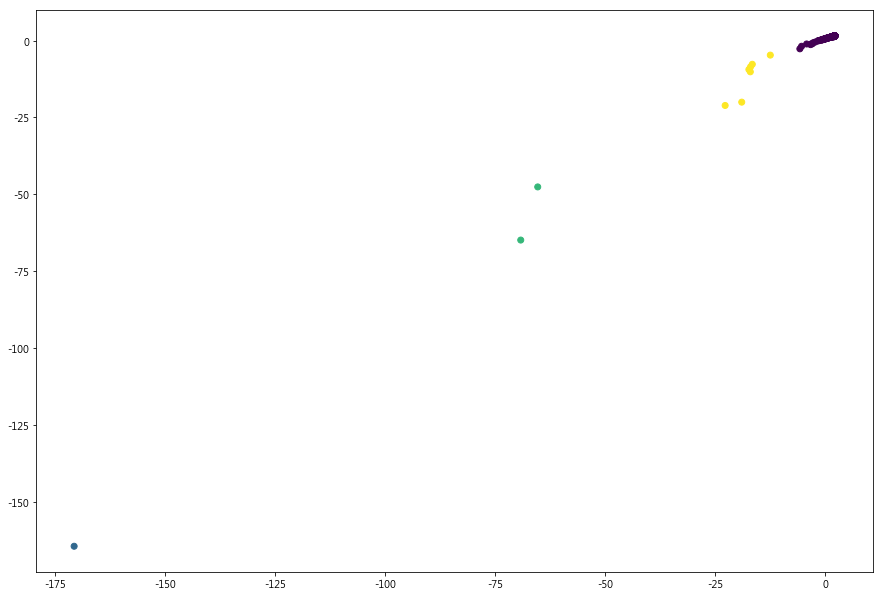

In [28]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(bottom=0.1)
plt.scatter(mds[:, 0], mds[:, 1], c=clustering.labels_)
plt.show()

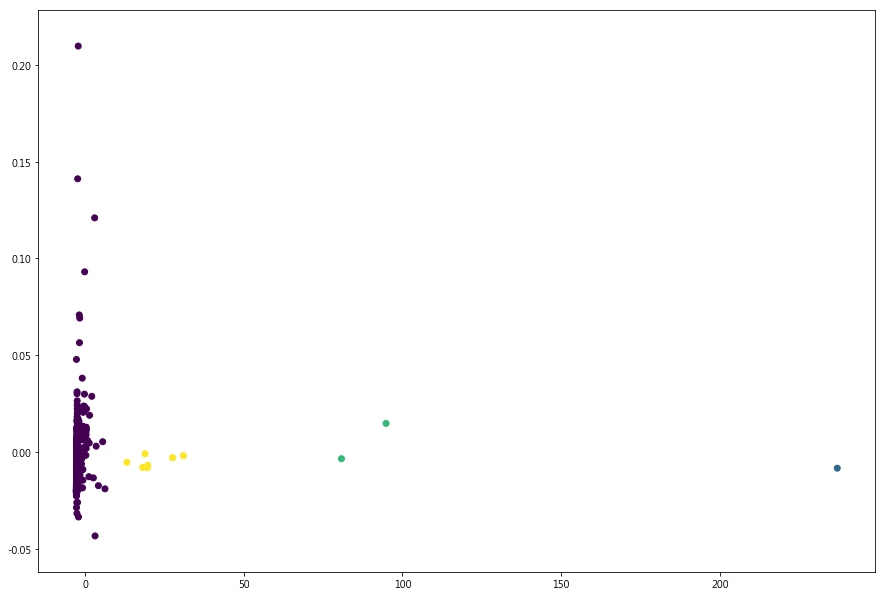

In [29]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(bottom=0.1)
plt.scatter(pca_picture[:, 0], pca_picture[:, 1], c=clustering.labels_)
plt.show()

# 繪製盒鬚圖

## 一. 抓出標準差

In [30]:
SD = np.std(NAV, axis=1, ddof=1)
SD = pd.DataFrame(data={'SD':SD, 'label':clustering.labels_})

In [31]:
SD

,SD,label
0,0.905888,0
1,0.137950,0
2,0.017362,0
3,0.159791,0
4,0.060786,0
5,0.065440,0
6,0.787184,0
7,0.176928,0
8,0.256944,0
9,2.324836,0


In [32]:
mean = np.mean(rate, axis=1)
mean = pd.DataFrame(data={'mean':mean, 'label':clustering.labels_})

In [33]:
mean

,mean,label
0,-0.001706,0
1,-0.001694,0
2,-0.000042,0
3,-0.000395,0
4,0.000071,0
5,0.000560,0
6,-0.001578,0
7,0.000752,0
8,0.000661,0
9,-0.000109,0


## 二.繪圖

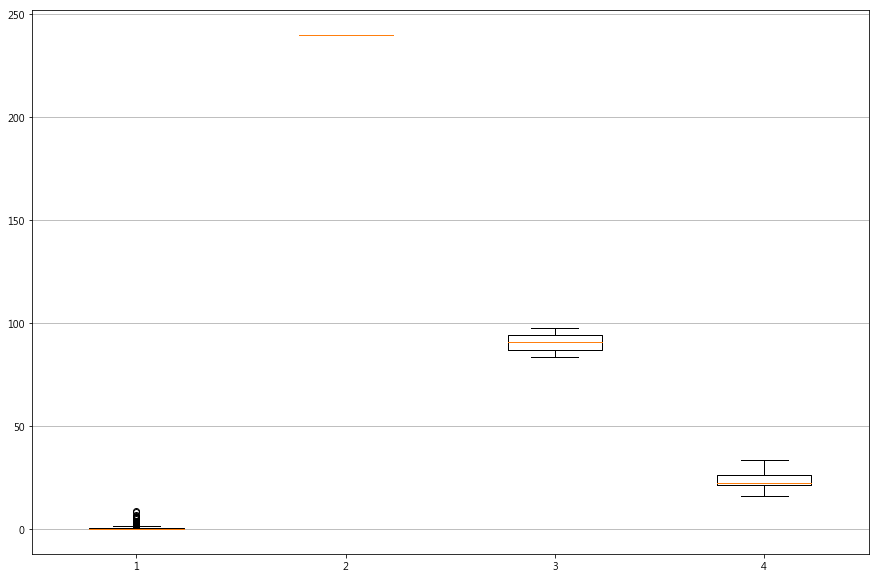

In [34]:
plt.figure(figsize=(15, 10))
plt.grid(axis='y')
plt.boxplot([SD[SD['label'] == 0]['SD'].values,
             SD[SD['label'] == 1]['SD'].values,
             SD[SD['label'] == 2]['SD'].values,
             SD[SD['label'] == 3]['SD'].values])
plt.show()

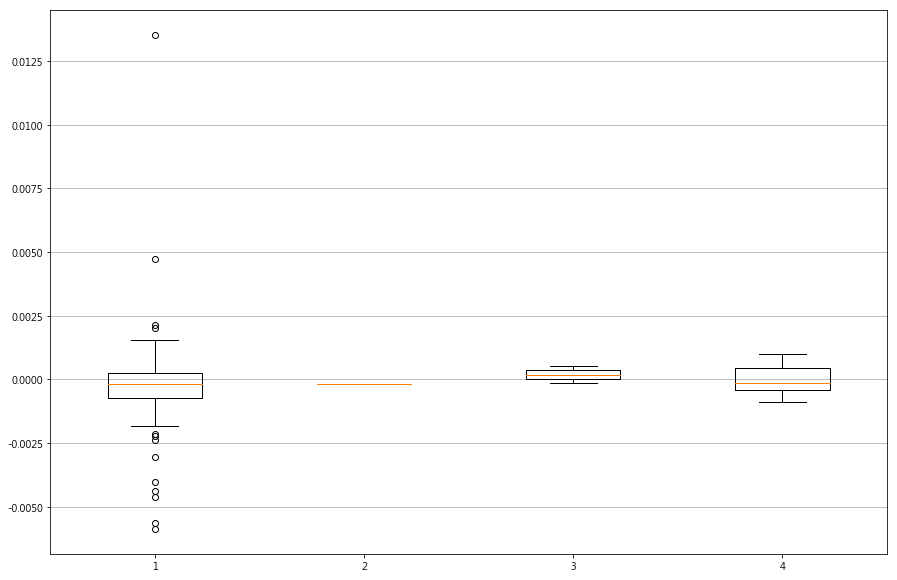

In [35]:
plt.figure(figsize=(15, 10))
plt.grid(axis='y')
plt.boxplot([mean[mean['label'] == 0]['mean'].values,
             mean[mean['label'] == 1]['mean'].values,
             mean[mean['label'] == 2]['mean'].values,
             mean[mean['label'] == 3]['mean'].values])
plt.show()

# 5.抓出四支基金

In [36]:
camp = pd.DataFrame(data=clustering.labels_, index=names,columns=['label'])
name_choose = []
for i in range(4):
    name_choose.append(camp[camp['label'] == i].sample(n=1).index[0])

In [37]:
name_choose

['FTZR0 富達歐公司債Aeud', 'ALZIS 聯博日本價SDJPYm', 'PAZ55 法百日小型NJ', 'SBZ82 瑞銀澳洲股票']

# 抓出四支基金各項數據

## 一. 淨值

In [38]:
NAV_choose = getNAV(name_choose, year+'-01-01', year+'-12-31')

In [39]:
NAV_choose

array([[1.19900e+01, 1.20100e+01, 1.20000e+01, 1.20300e+01, 1.20400e+01,
        1.20500e+01, 1.20200e+01, 1.20400e+01, 1.20400e+01, 1.20400e+01,
        1.20500e+01, 1.20500e+01, 1.20400e+01, 1.20700e+01, 1.21300e+01,
        1.21500e+01, 1.21300e+01, 1.21300e+01, 1.21300e+01, 1.21300e+01,
        1.21500e+01, 1.21400e+01, 1.21400e+01, 1.21500e+01, 1.21500e+01,
        1.21600e+01, 1.21500e+01, 1.21600e+01, 1.21700e+01, 1.21700e+01,
        1.22200e+01, 1.22400e+01, 1.22700e+01, 1.22500e+01, 1.22400e+01,
        1.22400e+01, 1.22600e+01, 1.22500e+01, 1.22800e+01, 1.23000e+01,
        1.23100e+01, 1.22900e+01, 1.22800e+01, 1.22800e+01, 1.22300e+01,
        1.22500e+01, 1.22600e+01, 1.22700e+01, 1.22600e+01, 1.22400e+01,
        1.22500e+01, 1.22500e+01, 1.22500e+01, 1.22500e+01, 1.22500e+01,
        1.22500e+01, 1.23000e+01, 1.23000e+01, 1.23200e+01, 1.23300e+01,
        1.23300e+01, 1.23300e+01, 1.23400e+01, 1.23500e+01, 1.23400e+01,
        1.23300e+01, 1.23300e+01, 1.23200e+01, 1.22

## 二. 漲跌幅

In [40]:
temp = np.zeros((len(name_choose), len(NAV_choose[0])-1))
for j in range (len(name_choose)):
    for i in range (len(NAV_choose[0])-1):
        temp[j][i] = (NAV_choose[j][i+1] - NAV_choose[j][i]) / NAV_choose[j][i]

rate_choose = []
for i in range(len(temp[0])):
    rate_choose.append((temp[0][i] + temp[1][i] + temp[2][i] + temp[3][i])/4)

In [41]:
rate_choose

[-0.014081277454356847,
 0.0013050799996545672,
 0.006253472777966913,
 0.0011170350114452442,
 -0.0016851919371076779,
 -0.0018519759150876496,
 -0.011145867660526425,
 0.003984060211577933,
 -0.002323236879775194,
 0.0010837476411426489,
 0.008924744035336944,
 0.0006819428199060012,
 0.002168103811350528,
 0.009396422153367985,
 0.0038926060139833265,
 0.003538581585661565,
 0.0041479396845942335,
 -0.004733552253120646,
 0.0,
 0.0028858632020174165,
 -0.0011376675943150687,
 0.009917019273399138,
 -0.0006366533987612981,
 0.0015070930593704926,
 0.0020951332416480795,
 0.00042605630851073406,
 0.0004939573862975696,
 0.0022865917275584745,
 0.006467098991347061,
 0.019821878783100877,
 0.0007543977452882741,
 0.0037275729085908694,
 0.00245022973440306,
 -0.002373159736440084,
 -0.006043531537753684,
 0.004975795825504051,
 0.0036971674892648165,
 -0.0038793707661861714,
 -0.0028782394339596446,
 0.000512008726716924,
 0.008914644231161624,
 -0.0013418211549453794,
 0.0036046087416

## 三. 收益率

In [42]:
profit_choose = []
temp = NAV_choose[0][0] + NAV_choose[1][0] + NAV_choose[2][0] + NAV_choose[3][0]
for i in range(len(NAV_choose[0])):
    profit_choose.append((NAV_choose[0][i] + NAV_choose[1][i] + NAV_choose[2][i] + NAV_choose[3][i] - temp) / temp * 100)

In [43]:
profit_choose

[0.0,
 -2.2549355220245775,
 -1.9369015724385565,
 -0.9597901775373578,
 -1.3233307573574156,
 -1.3584856541373118,
 -1.5229347266834905,
 -3.2325081327727623,
 -2.3578379021033418,
 -2.630518960070995,
 -2.6236007223665045,
 -0.7736639601837544,
 -1.1319774270715224,
 -0.9926902412876282,
 -0.031260185183298365,
 0.5120520825432974,
 1.0600277549447388,
 1.6588396629229458,
 0.6492894201184253,
 0.6492894201184253,
 0.5953271660233658,
 -0.23983224042259296,
 1.1926529340502314,
 0.9239690800896342,
 1.144020285297882,
 1.5364637248611726,
 1.926549838984435,
 1.9275747630887903,
 2.6568595095533025,
 2.9880124876752863,
 6.528664052426934,
 6.368212183887774,
 7.277627341695353,
 7.490452831967792,
 7.372689052375674,
 6.177730039090606,
 6.9232598326094115,
 7.830010187745608,
 7.325747528395525,
 6.7958105202309795,
 6.797962860850149,
 8.172949793067824,
 8.467103011022022,
 8.976695275714835,
 9.335828681886097,
 10.021195430478373,
 9.832763133889951,
 10.2517008615512,
 10.7516

# 繪製漲跌幅對比圖

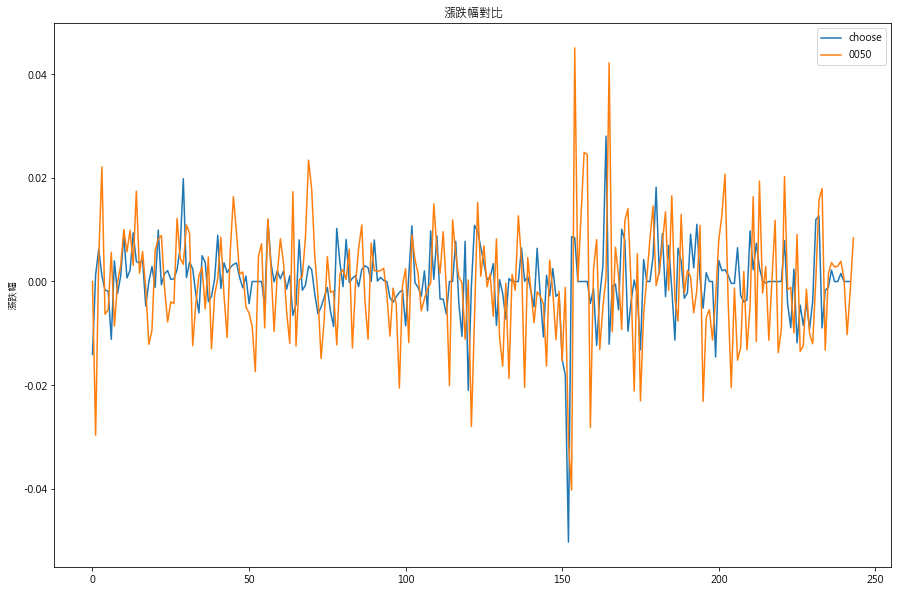

In [44]:
plt.figure(figsize=(15, 10))
plt.ylabel('漲跌幅')
plt.title('漲跌幅對比')
plt.plot(rate_choose)
plt.plot(rate_0050)
plt.legend(['choose','0050'])
plt.show()

# 繪製收益率對比圖

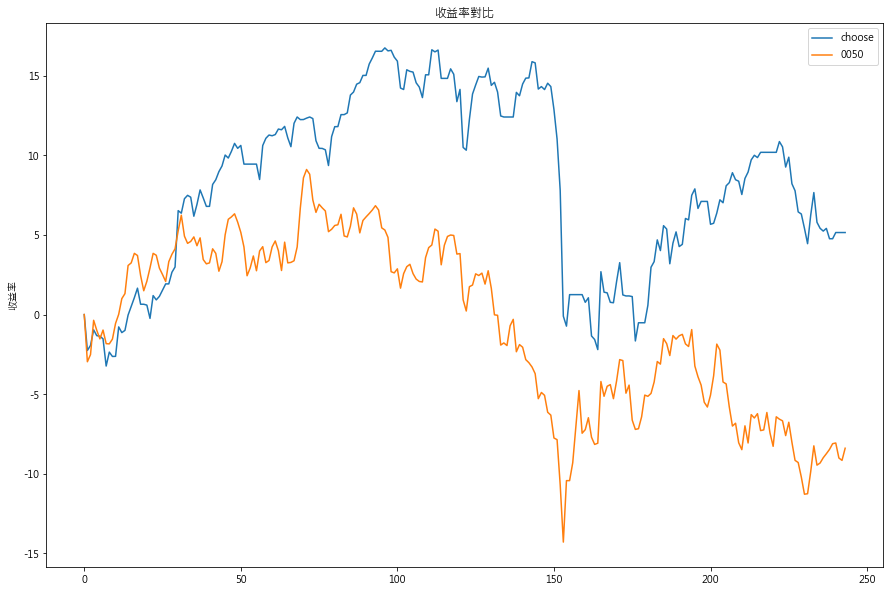

In [45]:
plt.figure(figsize=(15, 10))
plt.ylabel('收益率')
plt.title('收益率對比')
plt.plot(profit_choose)
plt.plot(profit_0050)
plt.legend(['choose','0050'])
plt.show()